## Analises básicas

In [2]:
import pandas as pd
import numpy as np

# Caminho do dataset
DATA_PATH = "../data/raw/synthetic_medical_triage.csv"

# Carregando o dataset
df = pd.read_csv(DATA_PATH)

# Visualização inicial
df.head()


,age,heart_rate,systolic_blood_pressure,oxygen_saturation,body_temperature,pain_level,chronic_disease_count,previous_er_visits,arrival_mode,triage_level
0,17.9,95.4,147.1,97.4,36.48,1,0,0,walk_in,0
1,79.2,147.9,158.6,96.0,39.35,10,4,2,ambulance,3
2,51.1,87.1,128.2,98.5,37.74,5,2,2,walk_in,1
3,56.8,84.7,147.2,92.5,37.55,4,4,4,walk_in,1
4,39.2,58.0,107.8,99.0,36.26,2,1,1,walk_in,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      18000 non-null  float64
 1   heart_rate               18000 non-null  float64
 2   systolic_blood_pressure  18000 non-null  float64
 3   oxygen_saturation        18000 non-null  float64
 4   body_temperature         18000 non-null  float64
 5   pain_level               18000 non-null  int64  
 6   chronic_disease_count    18000 non-null  int64  
 7   previous_er_visits       18000 non-null  int64  
 8   arrival_mode             18000 non-null  object 
 9   triage_level             18000 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 1.4+ MB


In [4]:
df.shape

(18000, 10)

In [5]:
df.describe()

,age,heart_rate,systolic_blood_pressure,oxygen_saturation,body_temperature,pain_level,chronic_disease_count,previous_er_visits,triage_level
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,44.716244,83.292322,128.072739,96.085183,37.224236,3.402111,1.072611,1.265056,0.697722
std,19.101056,16.964405,18.813277,3.330830,0.914978,2.039249,1.312204,1.454887,0.898923
min,0.000000,33.400000,65.800000,79.500000,34.470000,1.000000,0.000000,0.000000,0.000000
25%,31.200000,71.500000,114.900000,94.300000,36.580000,2.000000,0.000000,0.000000,0.000000
50%,44.000000,81.600000,126.900000,96.600000,37.120000,3.000000,1.000000,1.000000,0.000000
75%,57.500000,93.200000,139.900000,98.700000,37.770000,5.000000,2.000000,2.000000,1.000000
max,95.000000,152.300000,219.700000,100.000000,41.130000,10.000000,10.000000,11.000000,3.000000


In [6]:
df.isnull().sum().sort_values(ascending=False)


age                        0
heart_rate                 0
systolic_blood_pressure    0
oxygen_saturation          0
body_temperature           0
pain_level                 0
chronic_disease_count      0
previous_er_visits         0
arrival_mode               0
triage_level               0
dtype: int64

## Análise do target

In [7]:
df["triage_level"].value_counts()

triage_level
0    9924
1    4484
2    2701
3     891
Name: count, dtype: int64

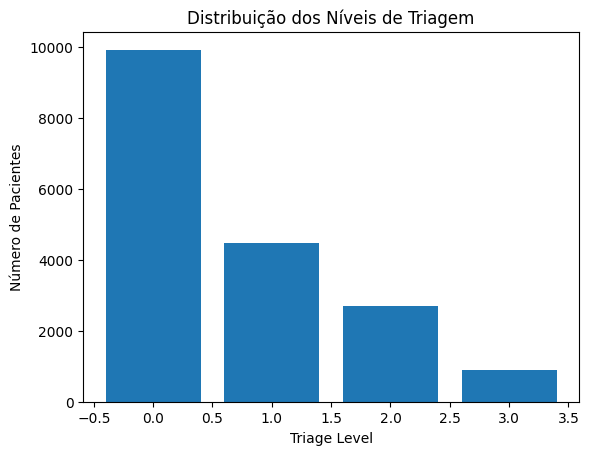

In [8]:
import matplotlib.pyplot as plt

counts = df["triage_level"].value_counts().sort_index()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel("Triage Level")
plt.ylabel("Número de Pacientes")
plt.title("Distribuição dos Níveis de Triagem")
plt.show()


ANÁLISE DA DISTRIBUIÇÃO DO TARGET

A distribuição do nível de triagem apresenta forte desbalanceamento entre as classes, com predominância de casos de baixa urgência (nível 0, ~55%), seguidos por casos de média (nível 1, ~25%) e alta urgência (nível 2, ~15%). Os casos críticos (nível 3) representam aproximadamente 5% do total, refletindo de forma realista o fluxo típico de um pronto-socorro, onde situações de risco iminente são menos frequentes, porém de alto impacto.

Do ponto de vista de aprendizado de máquina, esse desbalanceamento impõe desafios importantes, pois modelos podem obter alta acurácia global ao favorecer as classes majoritárias, enquanto falham justamente na identificação de casos críticos. Em um contexto de triagem hospitalar, esse tipo de erro é inaceitável, uma vez que a sub-classificação de pacientes graves pode resultar em riscos clínicos significativos.

Diante disso, o pré-processamento e a modelagem devem priorizar estratégias que garantam sensibilidade às classes minoritárias. Recomenda-se o uso de divisão estratificada dos dados, métricas de avaliação por classe - com ênfase em Recall para os níveis de alta e crítica urgência - e o emprego de pesos de classe durante o treinamento dos modelos. Técnicas de oversampling devem ser utilizadas com cautela, considerando a presença de ruído nos rótulos. Essas decisões asseguram um modelo mais alinhado às exigências clínicas e aos objetivos de segurança do sistema de triagem.

## Distribuição das Variáveis Numéricas

Idade concentrada em adultos?
Saturação dentro de 85–100?
Temperatura com febre (>37.5)?
Frequência cardíaca elevada em casos graves?

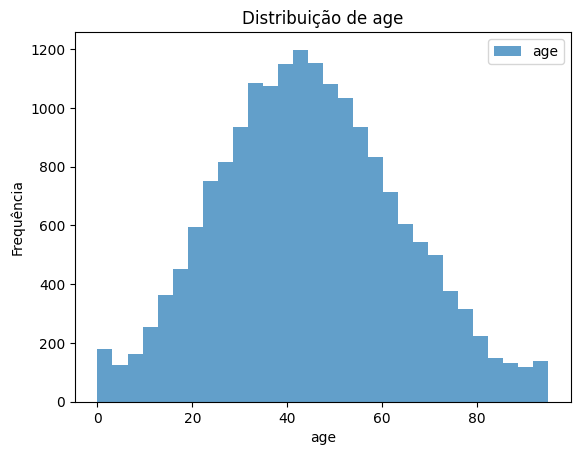

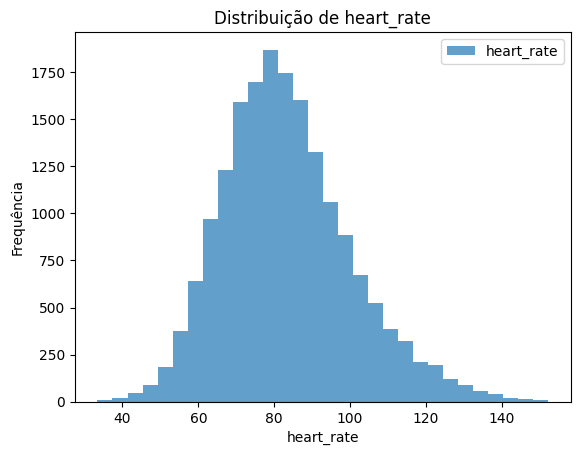

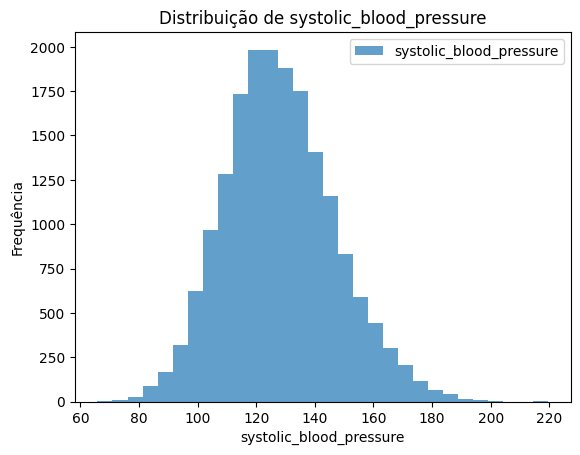

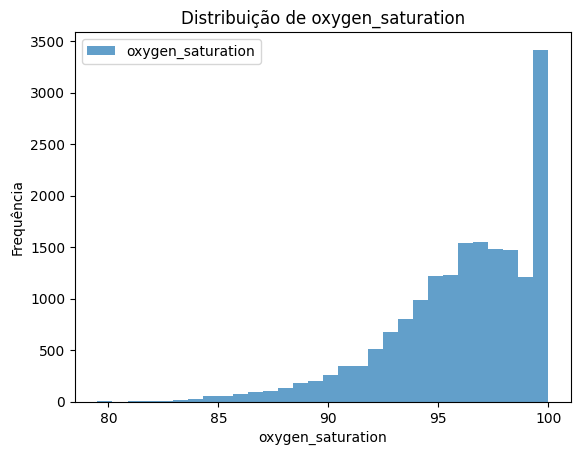

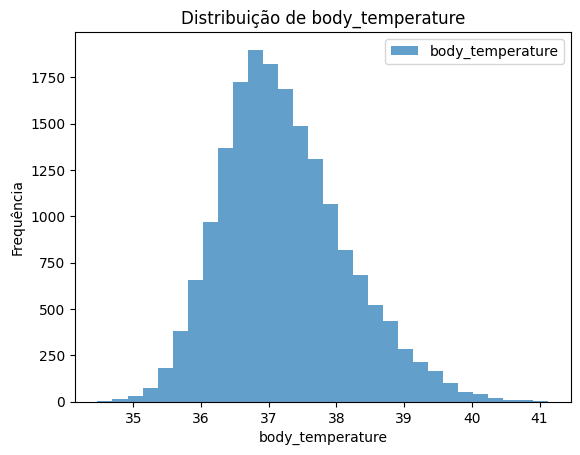

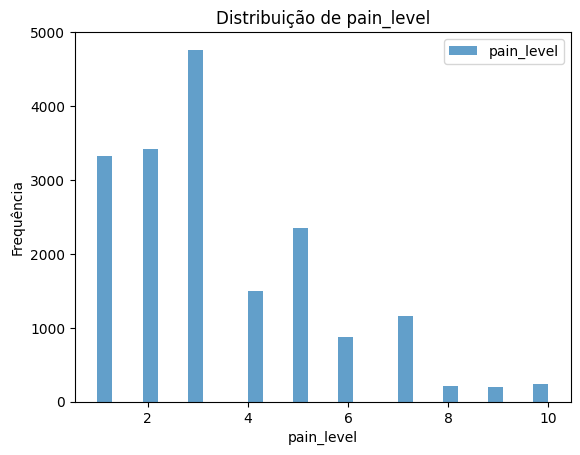

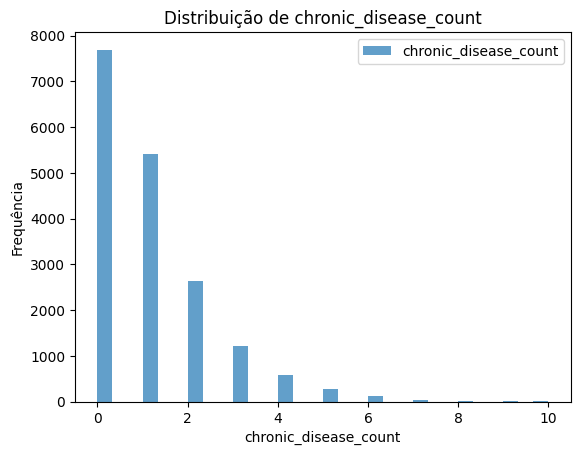

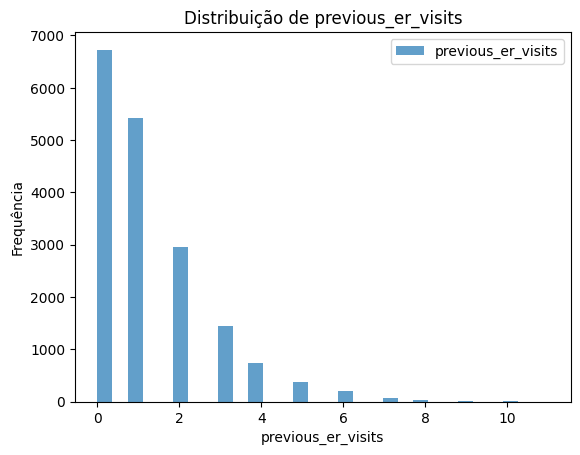

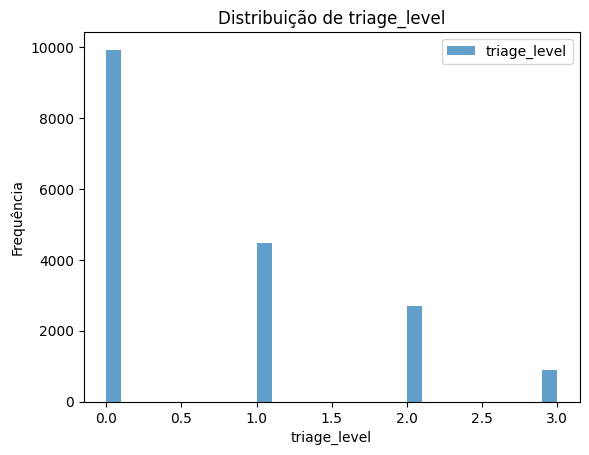

In [9]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_columns:
    plt.figure()
    plt.hist(df[col], bins=30, alpha=0.7, label=col)
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.title(f"Distribuição de {col}")
    plt.legend()
    plt.show()


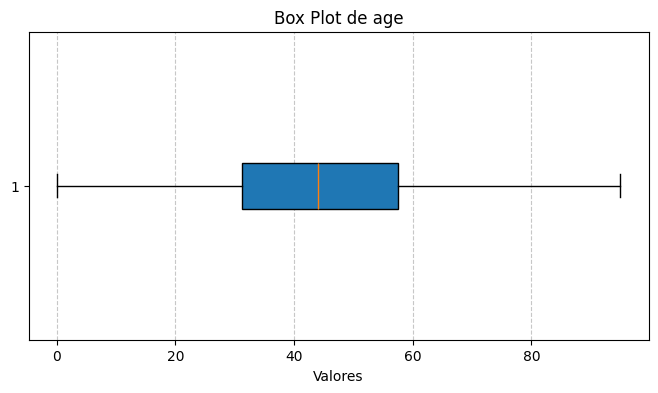

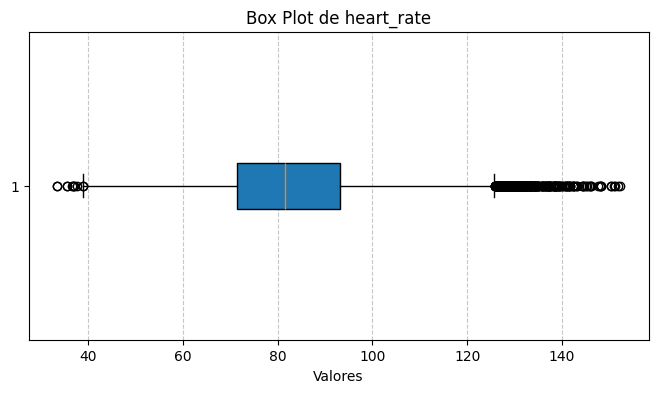

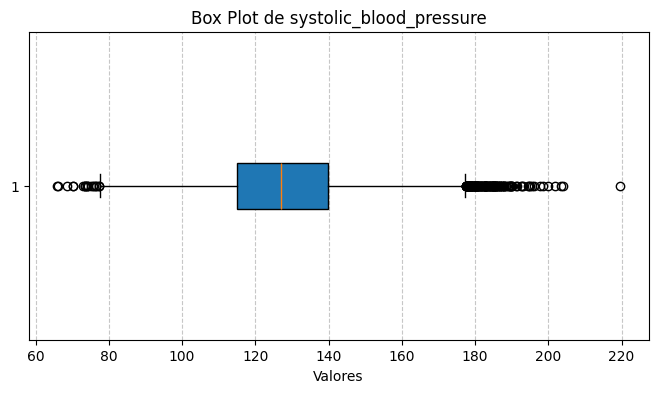

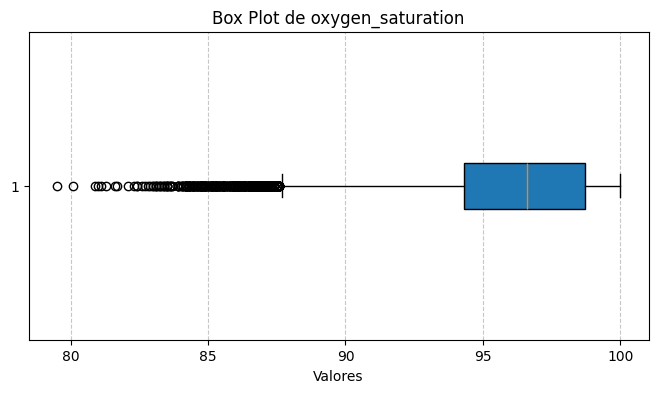

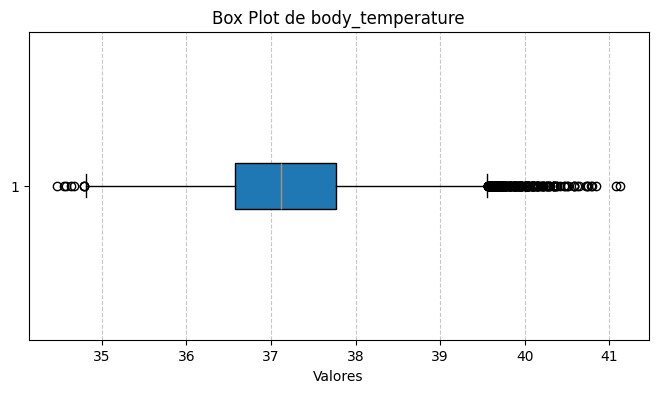

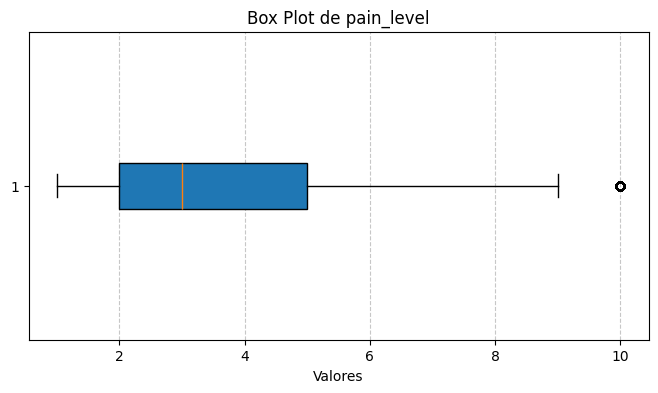

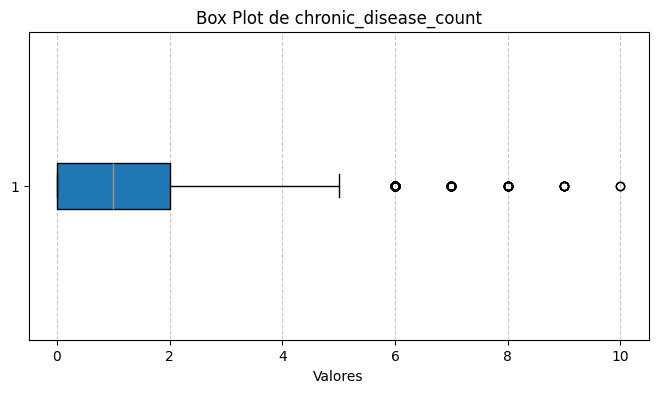

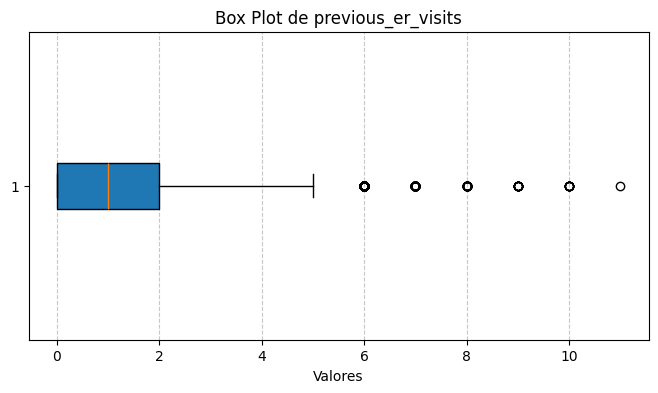

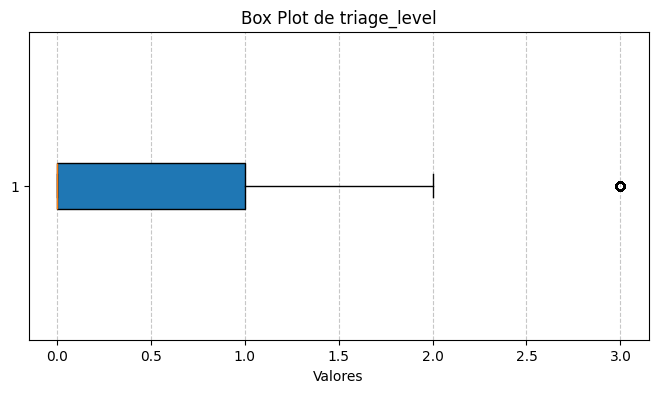

In [16]:


for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    # O boxplot não aceita o parâmetro 'bins', então removemos
    # Usamos o parâmetro 'vert=False' se quiser o boxplot na horizontal
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    
    plt.title(f"Box Plot de {col}")
    plt.xlabel("Valores")
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Ajuda na leitura dos quartis
    plt.show()

In [18]:
df["chronic_disease_count"].value_counts()

chronic_disease_count
0     7695
1     5409
2     2628
3     1207
4      592
5      274
6      122
7       44
8       20
9        7
10       2
Name: count, dtype: int64

ANÁLISE DAS FEATURES NUMÉRICAS DISCRETAS

A análise das variáveis pain_level, chronic_disease_count e previous_er_visits mostra distribuições coerentes com o contexto clínico, sem indícios claros de dados ruidosos, mas com assimetrias importantes que exigem atenção no pré-processamento. O pain_level é uma variável ordinal bem definida, concentrada entre valores baixos e médios, com poucos casos nos níveis mais altos, o que reflete a realidade de atendimentos de emergência. Nesse caso, a melhor abordagem é mantê-la como variável numérica ordinal, aplicando normalização ou padronização para evitar que a escala influencie indevidamente o modelo, especialmente em abordagens lineares.

Já chronic_disease_count e previous_er_visits são variáveis de contagem fortemente assimétricas à direita, com grande concentração nos valores mais baixos e caudas longas compostas por poucos casos extremos. Embora esses valores altos sejam clinicamente plausíveis e potencialmente informativos, eles oferecem baixo suporte estatístico e podem prejudicar a generalização do modelo. Por isso, é recomendado aplicar estratégias como o agrupamento ou cap dos valores mais elevados, além da criação de variáveis binárias auxiliares que indiquem a presença de doenças crônicas ou o histórico de uso frequente do pronto-socorro.

De forma geral, o pré-processamento deve focar não na remoção de dados, mas na reorganização estatística das distribuições, reduzindo o impacto de extremos raros e facilitando a aprendizagem de padrões relevantes. Essas transformações tornam as features mais estáveis, interpretáveis e alinhadas ao objetivo de prever corretamente o nível de triagem, especialmente em modelos sensíveis à escala e à distribuição dos dados.

ANÁLISE DAS FEATURES NUMÉRICAS CONTÍNUAS

As variáveis numéricas contínuas do dataset apresentam distribuições coerentes com um cenário realista de triagem hospitalar e não indicam problemas graves de qualidade dos dados. A feature age possui uma distribuição aproximadamente normal, concentrada em adultos de meia-idade, mas com boa representação de crianças e idosos. No contexto do problema, a idade atua como um fator de risco indireto e deve ser mantida como variável contínua, passando apenas por padronização para evitar impactos de escala no modelo.

A heart_rate também segue uma distribuição próxima da normalidade, com concentração em valores fisiológicos típicos e uma cauda à direita representando casos de taquicardia, que são clinicamente relevantes para níveis mais altos de urgência. Esses valores extremos não devem ser removidos, pois carregam informação importante para o modelo, sendo recomendada apenas a padronização e uma análise cuidadosa de outliers muito raros.

A systolic_blood_pressure apresenta uma distribuição bem comportada, centrada em valores normais, com caudas que representam tanto hipotensão quanto hipertensão severa. Esses extremos são esperados em um ambiente de emergência e têm forte relação com o triage_level, especialmente em casos críticos. Assim, a variável deve ser mantida contínua, padronizada e, se desejado, complementada por features derivadas que sinalizem faixas clínicas relevantes.

A oxygen_saturation se destaca por sua distribuição assimétrica à esquerda, com grande concentração entre 95% e 100% e uma cauda longa para valores baixos. Essa característica reflete bem o cenário clínico, onde pequenas reduções na saturação indicam agravamento significativo do estado do paciente. Por isso, trata-se de uma variável altamente informativa, que exige escalonamento cuidadoso e pode se beneficiar da criação de uma feature auxiliar binária indicando níveis criticamente baixos.

Já a body_temperature apresenta uma distribuição aproximadamente normal, centrada em torno de 37 °C, com caudas representando febre e hipotermia. Embora a variabilidade seja menor que em outras features, variações nessa variável possuem forte significado clínico e contribuem para a definição da urgência. Assim como as demais, deve ser padronizada e mantida em formato contínuo, podendo ser enriquecida com indicadores clínicos derivados.

De forma geral, as features contínuas apresentam escalas muito distintas e relações potencialmente não lineares com o triage_level, o que torna o escalonamento obrigatório e favorece o uso de modelos capazes de capturar interações complexas.

## Boxplots por nível de triagem

<Figure size 640x480 with 0 Axes>

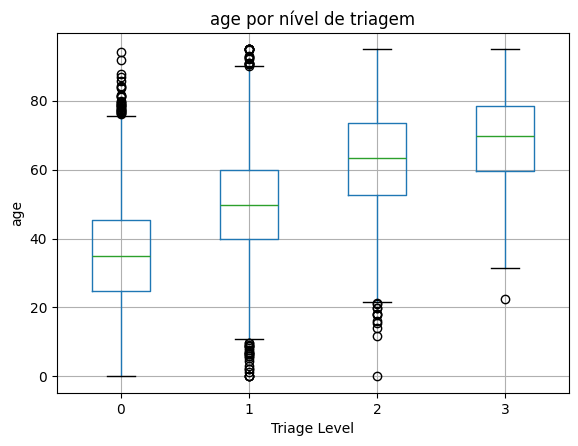

<Figure size 640x480 with 0 Axes>

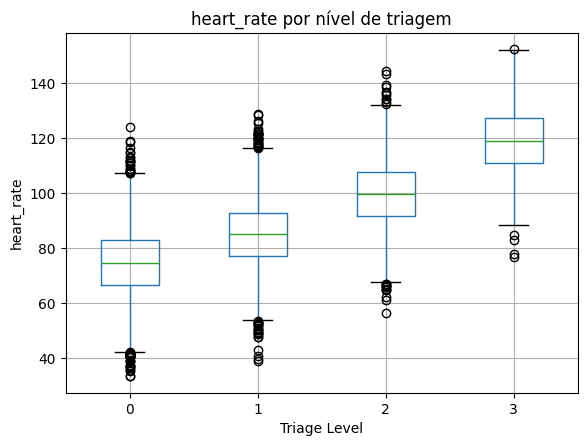

<Figure size 640x480 with 0 Axes>

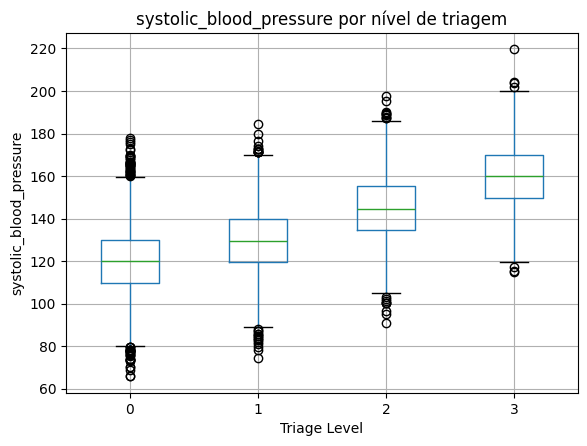

<Figure size 640x480 with 0 Axes>

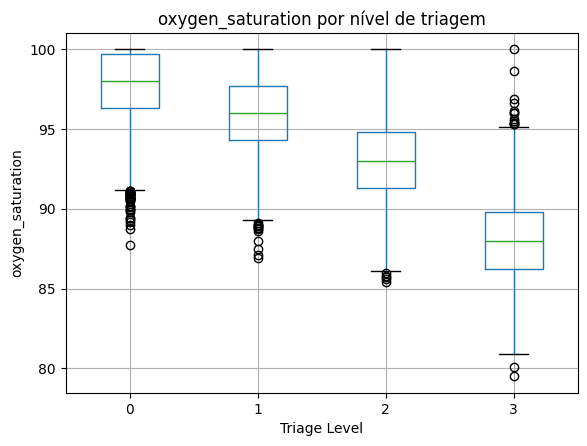

<Figure size 640x480 with 0 Axes>

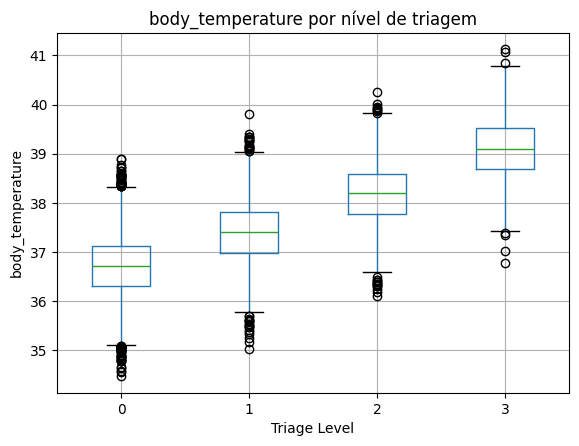

<Figure size 640x480 with 0 Axes>

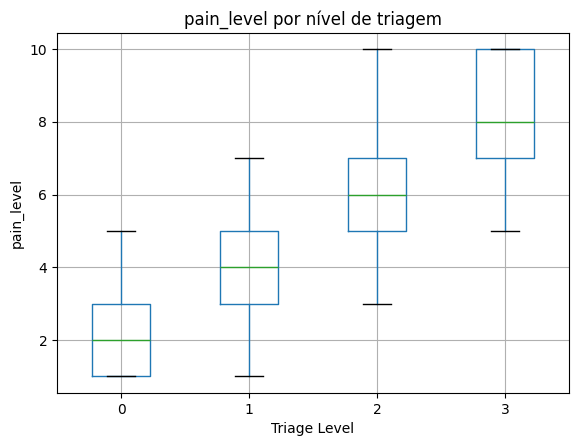

<Figure size 640x480 with 0 Axes>

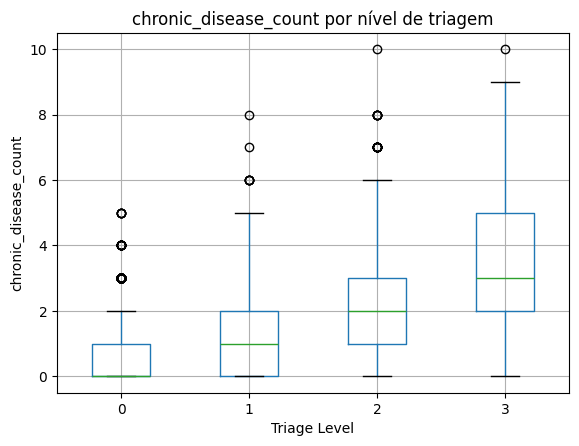

<Figure size 640x480 with 0 Axes>

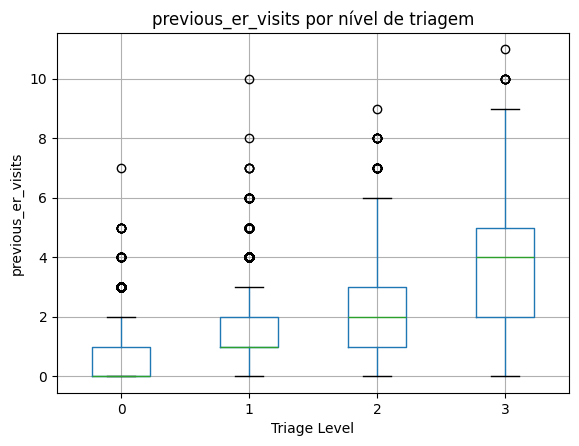

<Figure size 640x480 with 0 Axes>

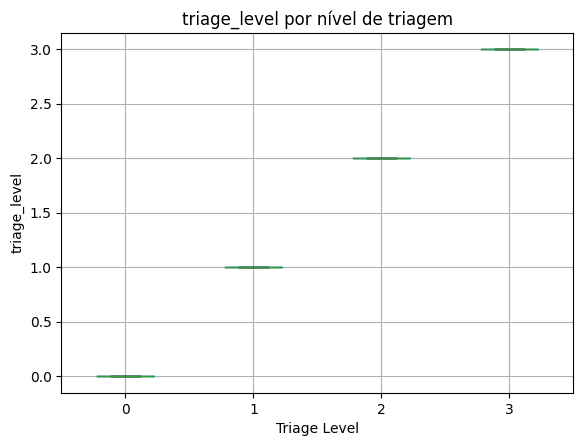

In [10]:
for col in numeric_columns:
    plt.figure()
    df.boxplot(column=col, by="triage_level")
    plt.title(f"{col} por nível de triagem")
    plt.suptitle("")
    plt.xlabel("Triage Level")
    plt.ylabel(col)
    plt.show()


## Análise da Variável Categórica (arrival_mode)

In [11]:
df["arrival_mode"].value_counts()


arrival_mode
walk_in       11963
wheelchair     3067
ambulance      2970
Name: count, dtype: int64

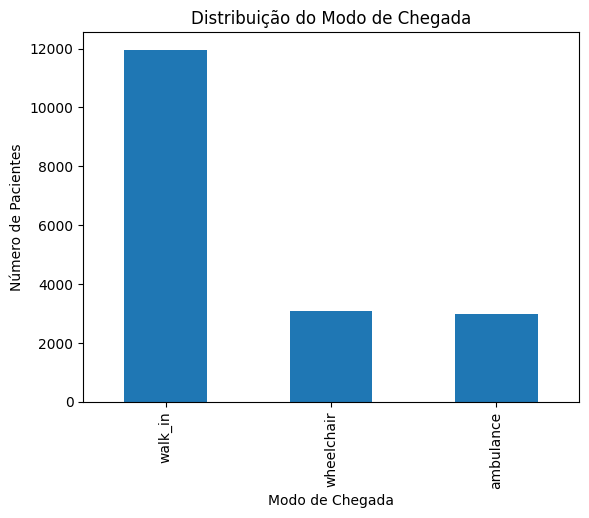

In [12]:
df["arrival_mode"].value_counts().plot(kind="bar")
plt.xlabel("Modo de Chegada")
plt.ylabel("Número de Pacientes")
plt.title("Distribuição do Modo de Chegada")
plt.show()


In [13]:
df["arrival_mode"].value_counts()

arrival_mode
walk_in       11963
wheelchair     3067
ambulance      2970
Name: count, dtype: int64

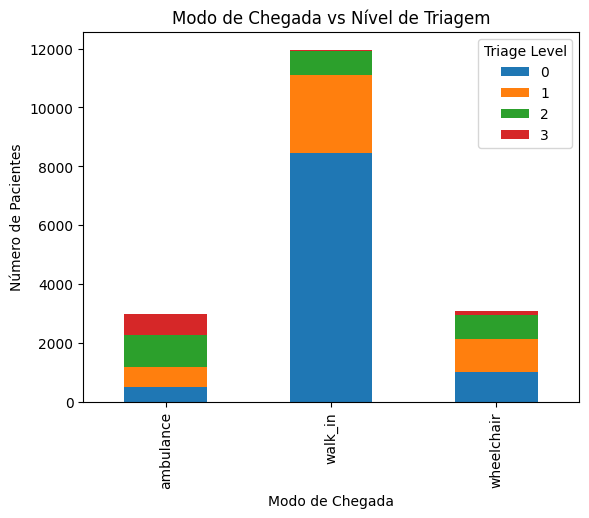

In [ ]:
pd.crosstab(
    df["arrival_mode"],
    df["triage_level"],
    normalize="index"
) * 100

pd.crosstab(
    df["arrival_mode"],
    df["triage_level"]
).plot(kind="bar", stacked=True)

plt.xlabel("Modo de Chegada")
plt.ylabel("Número de Pacientes")
plt.title("Modo de Chegada vs Nível de Triagem")
plt.legend(title="Triage Level")
plt.show()


ANÁLISE DA FEATURE CATEGÓRICA (arrival_mode)

A análise da feature arrival_mode revela que o modo de chegada funciona como um forte preditor indireto da gravidade do paciente, apresentando uma correlação clara com o triage_level. O grupo Walk-in (pacientes que chegam caminhando) compõe a vasta maioria dos dados (~12.000 registros) e está massivamente concentrado no nível de triagem 0 (baixo), confirmando que a autonomia de locomoção costuma indicar estabilidade clínica. Em contrapartida, o grupo Ambulance (ambulância), embora seja numericamente menor, possui a maior proporção relativa de casos críticos (nível 3) e altos (nível 2), sendo um sinalizador crucial de urgência. Já o modo Wheelchair (cadeira de rodas) atua como um intermediário, com uma distribuição equilibrada entre os níveis 0, 1 e 2.

No pré-processamento, a estratégia recomendada é a aplicação de One-Hot Encoding para transformar essas categorias em colunas binárias, evitando criar uma hierarquia numérica artificial que poderia confundir modelos lineares. Além disso, dada a importância da ambulância para a detecção da classe minoritária (crítica), é essencial garantir que essa variável esteja bem representada nas divisões de treino e teste através de amostragem estratificada. Por fim, a criação de variáveis de interação — como combinar a chegada por ambulância com altos níveis de dor ou baixa saturação — pode potencializar a capacidade do modelo de identificar padrões de risco extremo que passariam despercebidos em análises isoladas.

## Correlação entre variáveis numéricas

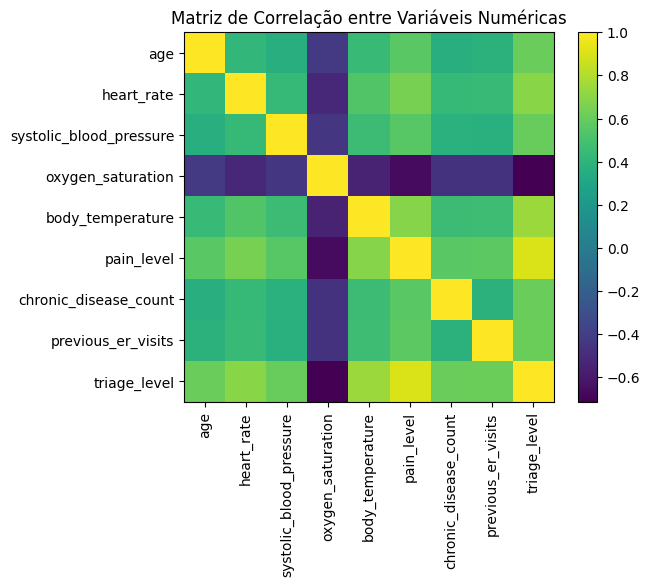

In [ ]:
corr = df[numeric_columns].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()
